In [20]:
import src.struc2vec  as s2v
import networkx as nx
from gensim.models import Word2Vec
import numpy as np
from sklearn.decomposition import PCA

In [21]:
# Construct graph
G = nx.barbell_graph(20, 5)

In [22]:
# Create s2v graph object
s2vG = s2v.struc2vec(G)

In [23]:
# Make 3 layer ml graph
s2vG.getMultiLevelGraph(3)

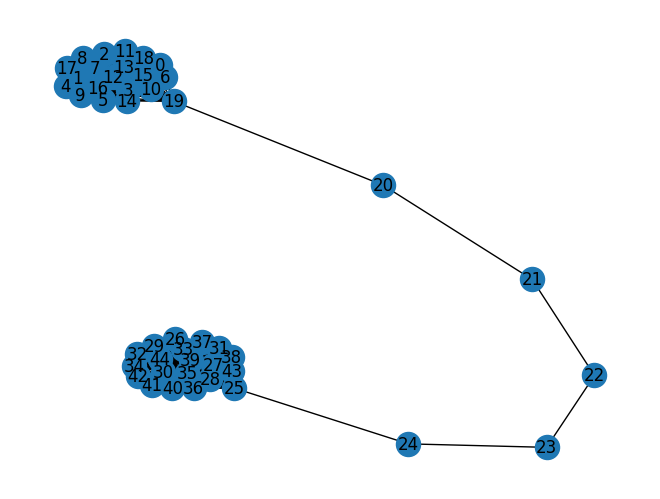

In [24]:
nx.draw_spring(s2vG.G, with_labels=True)

In [25]:
walks = []
for node in s2vG.nodes:
    walk_node, layers = s2vG.getRandomWalks(start_node = node, number_of_walks = 300, walk_length=15)
    walks.extend(walk_node)

In [26]:
model = Word2Vec(walks, vector_size=50)

In [27]:
embeddings = {node: model.wv[node] for node in s2vG.nodes}

In [28]:
X = np.array(list(embeddings.values()))

In [29]:
pca = PCA(n_components=3)
X_transform = pca.fit_transform(X)

In [30]:
node_embeddings = {}
for node, embedding in enumerate(X_transform):
    emb_list = list(embedding)
    index = emb_list.index(max(emb_list))
    node_embeddings[node] = index

In [31]:
cmap = {0:"green",1:"yellow", 2:"red"}
nodecolors = [cmap[v] for k,v in node_embeddings.items()]

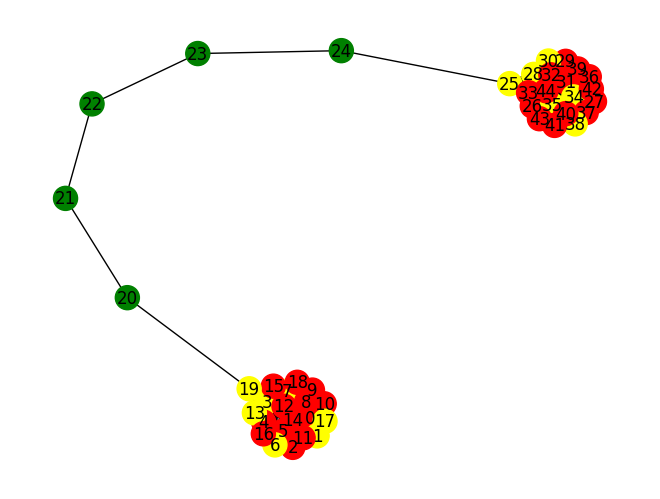

In [32]:
nx.draw_spring(s2vG.G, with_labels=True, node_color=nodecolors)